In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import seaborn as sns
import folium
%matplotlib inline

### Our World Data

In [2]:
url = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
world_data = pd.read_csv(url) # source ourworld in data
world_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [3]:
# FMT = '%b %d, %Y'
FMT = '%Y-%m-%d'
date = world_data['date']
world_data['day'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-31", FMT)).days)
world_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,day
0,2019-12-31,Afghanistan,0,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0,1
2,2020-01-02,Afghanistan,0,0,0,0,2
3,2020-01-03,Afghanistan,0,0,0,0,3
4,2020-01-04,Afghanistan,0,0,0,0,4


In [4]:
def logistic_model(x, a, b, c):
    return c / (1 + np.exp(-(x - b) / a))

In [5]:
def predict_total_case(country='United States'):
    country_data = world_data[world_data['location'] == country]
    x = list(country_data['day'])
    y = list(country_data['total_cases'])
    try:
        fit = curve_fit(logistic_model, x, y, p0=[2,100,20000])
        coefs = fit[0]
        errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
        
        end_day = int(fsolve(lambda x : logistic_model(x, coefs[0], coefs[1], coefs[2]) - int(coefs[2]), coefs[1]))
        end_date = (datetime.strptime("2019-12-31", FMT) + timedelta(end_day)).date()
        peak_day = int(coefs[1])
        peak_date = (datetime.strptime("2019-12-31", FMT) + timedelta(peak_day)).date()
        prediction = 'Total {} +/ {} cases projected by {}, and will peak on {}'.format(int(coefs[2]), int(errors[2]), end_date, peak_date)
        print(prediction)
        pred_x = list(range(max(x), end_day))
        plt.rcParams['figure.figsize'] = [11.7, 8.27]
        plt.rc('font', size=14)
        plt.scatter(x, y, label="Real Data", color="red")
        plt.plot(x + pred_x, [logistic_model(i, coefs[0], coefs[1], coefs[2]) for i in x + pred_x], label="Logistic Model" )
        plt.legend(loc='upper left')
        plt.xlabel("Days Since 31 December 2019")
        plt.ylabel("Total Number of Infected People")
        plt.ylim((min(y) * 0.9, coefs[2] * 1.1))
        plt.show();
    except:
        prediction = 'cannot predict'
    print(prediction)

In [6]:
interact(predict_total_case, country=list(world_data['location'].unique()));

interactive(children=(Dropdown(description='country', index=198, options=('Afghanistan', 'Albania', 'Algeria',…

In [7]:
def predict_total_death(country='United States'):
    country_data = world_data[world_data['location'] == country]
    x = list(country_data['day'])
    y = list(country_data['total_deaths'])
    try:
        fit = curve_fit(logistic_model, x, y, p0=[2,100,1000])
        coefs = fit[0]
        errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
        
        end_day = int(fsolve(lambda x : logistic_model(x, coefs[0], coefs[1], coefs[2]) - int(coefs[2]), coefs[1]))
        end_date = (datetime.strptime("2019-12-31", FMT) + timedelta(end_day)).date()
        peak_day = int(coefs[1])
        peak_date = (datetime.strptime("2019-12-31", FMT) + timedelta(peak_day)).date()
        prediction = 'Total {} +/ {} deaths projected by {}, and will peak on {}'.format(int(coefs[2]), int(errors[2]), end_date, peak_date)
        
        pred_x = list(range(max(x), end_day))
        plt.rcParams['figure.figsize'] = [11.7, 8.27]
        plt.rc('font', size=14)
        
        plt.scatter(x, y, label="Real Data", color="red")
        plt.plot(x + pred_x, [logistic_model(i, coefs[0], coefs[1], coefs[2]) for i in x + pred_x], label="Logistic Model" )
        plt.legend(loc='upper left')
        plt.xlabel("Days Since 31 December 2019")
        plt.ylabel("Total Number of Fatality")
        plt.ylim((min(y) * 0.9, coefs[2] * 1.1))
        plt.show();
    except:
        prediction = 'cannot predict'
    print(prediction)

In [8]:
interact(predict_total_death, country=list(world_data['location'].unique()));

interactive(children=(Dropdown(description='country', index=198, options=('Afghanistan', 'Albania', 'Algeria',…

In [9]:
def plot_case_death(country='United_States', ax=None):
    country_data = world_data[world_data['location'] == country]
    day = list(country_data['day'])
    case = list(country_data['total_cases'])
    death = list(country_data['total_deaths'])
    plt.rcParams['figure.figsize'] = [11.7, 8.27]
    plt.plot(day, case, color="red", label='Cases')
    plt.plot(day, death, color='blue', label='Deaths')
    plt.legend(loc='upper left')

In [10]:
interact(plot_case_death, country=list(world_data['location'].unique()), ax=fixed(None));

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

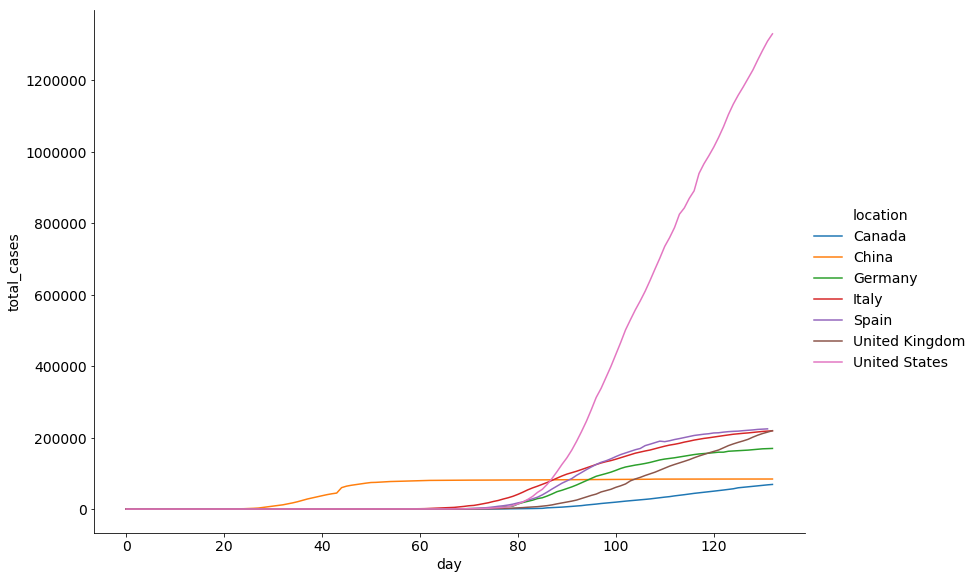

In [11]:
sns.relplot(x="day", y="total_cases", kind='line', height=8.27, aspect=11.7/8.27, hue='location', data=world_data[world_data.location.isin(['Canada', 'China', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'United States'])]);

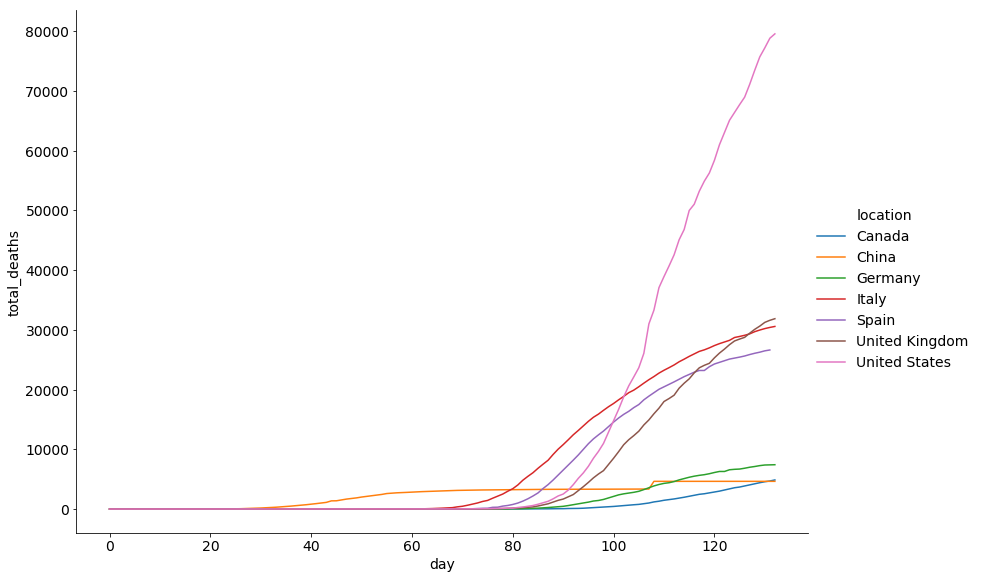

In [12]:
sns.relplot(x="day", y="total_deaths", kind='line', height=8.27, aspect=11.7/8.27, hue='location', data=world_data[world_data.location.isin(['Canada', 'China', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'United States'])]);

In [13]:
world_data['case_rate'] = round(world_data['new_cases'] / (world_data['total_cases'] - world_data['new_cases']) * 100, 2)
world_data['death_rate'] = round(world_data['new_deaths'] / (world_data['total_deaths'] - world_data['new_deaths']) * 100, 2)
world_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,case_rate,death_rate
0,2019-12-31,Afghanistan,0,0,0,0,0,NaN,NaN
1,2020-01-01,Afghanistan,0,0,0,0,1,NaN,NaN
2,2020-01-02,Afghanistan,0,0,0,0,2,NaN,NaN
3,2020-01-03,Afghanistan,0,0,0,0,3,NaN,NaN
4,2020-01-04,Afghanistan,0,0,0,0,4,NaN,NaN


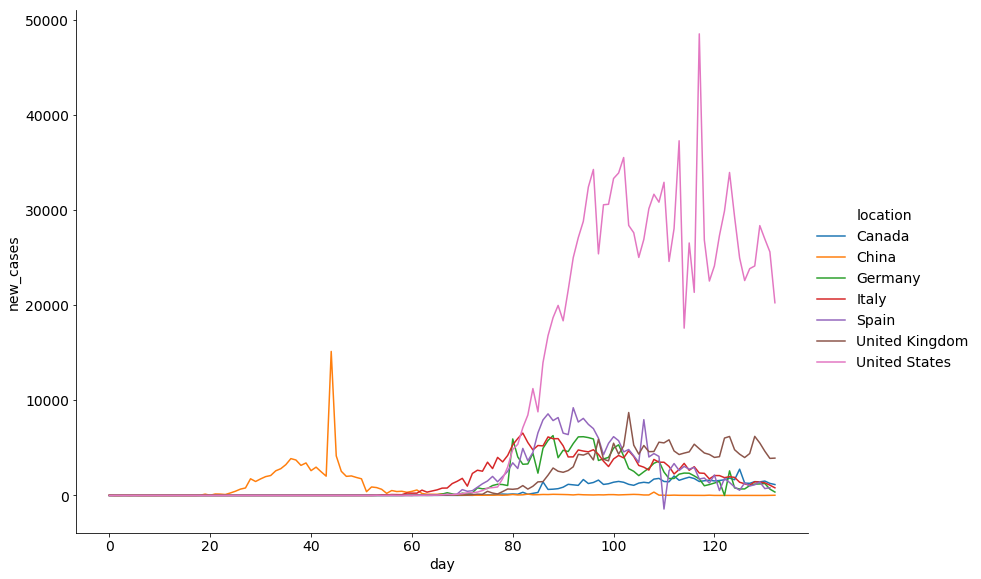

In [14]:
sns.relplot(x="day", y="new_cases", kind='line', height=8.27, aspect=11.7/8.27, hue='location', data=world_data[world_data.location.isin(['Canada', 'China', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'United States'])]);

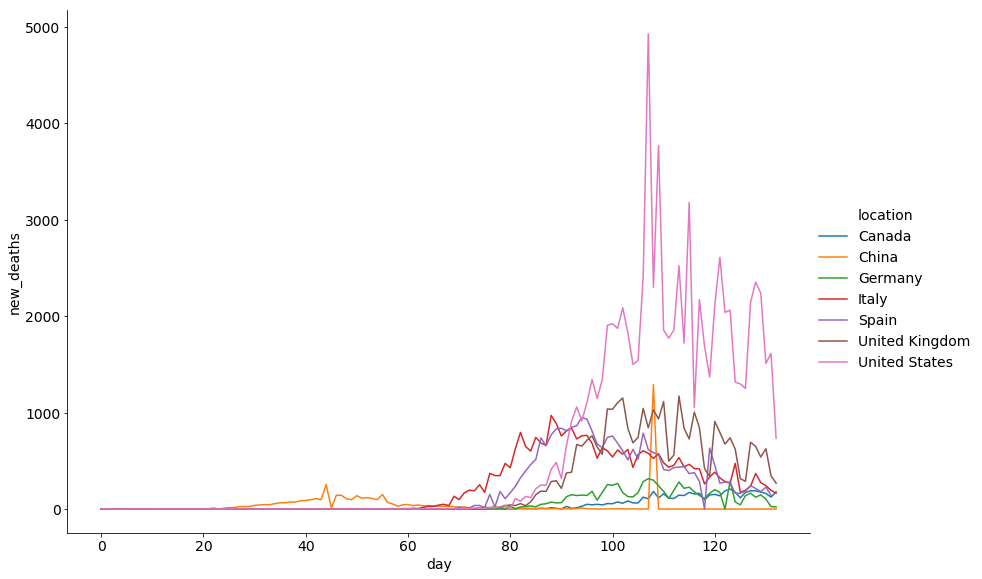

In [15]:
sns.relplot(x="day", y="new_deaths", kind='line', height=8.27, aspect=11.7/8.27, hue='location', data=world_data[world_data.location.isin(['Canada', 'China', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'United States'])]);

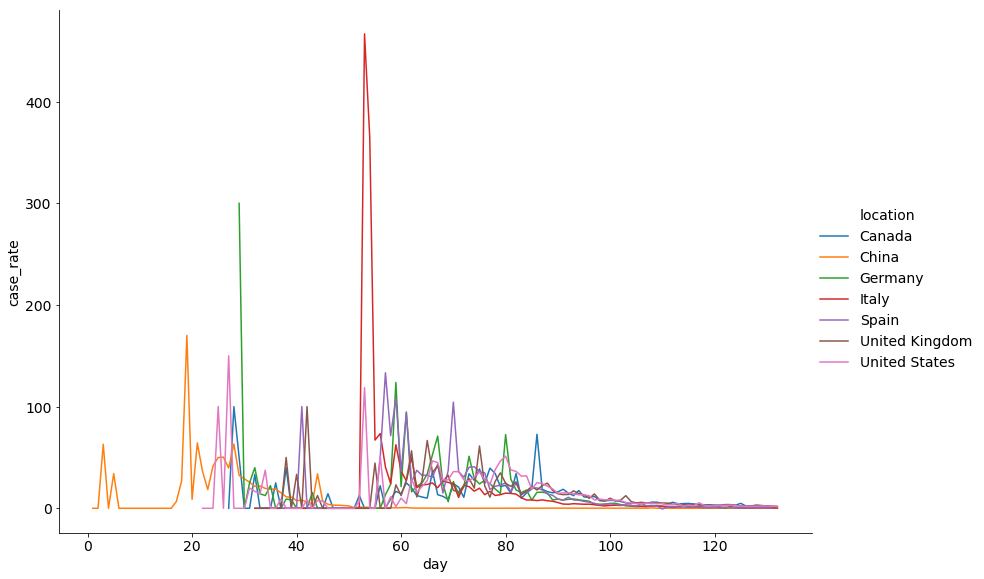

In [16]:
sns.relplot(x="day", y="case_rate", kind='line', height=8.27, aspect=11.7/8.27, hue='location', data=world_data[world_data.location.isin(['Canada', 'China', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'United States'])]);

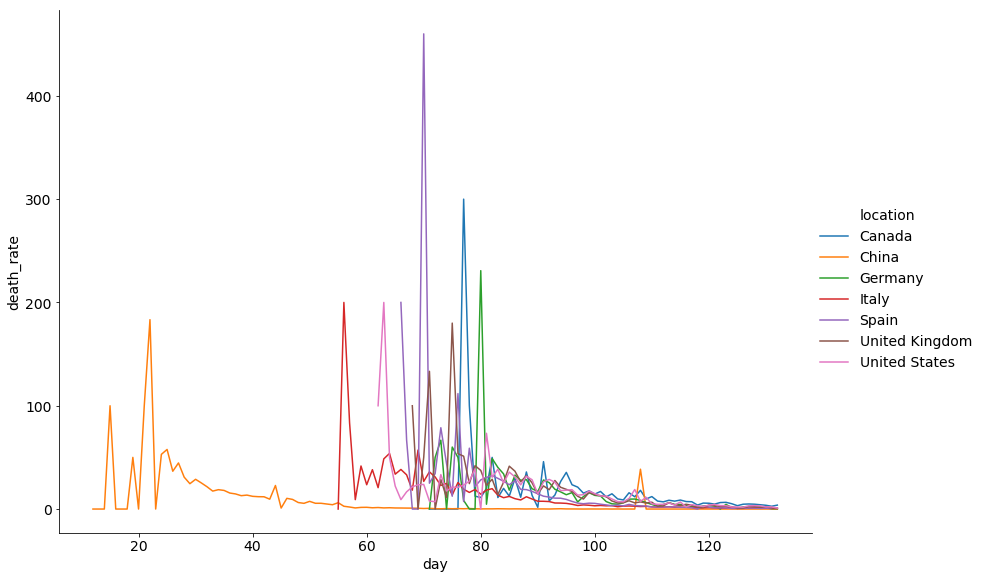

In [17]:
sns.relplot(x="day", y="death_rate", kind='line', height=8.27, aspect=11.7/8.27, hue='location', data=world_data[world_data.location.isin(['Canada', 'China', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'United States'])]);

In [18]:
def plot_by_day(country='United States', case_type='new_cases', ax=None):
    country_data = world_data[world_data['location']==country]
    sns.relplot(x="day", y=case_type, kind='line', height=8.27, aspect=11.7/8.27, data=country_data, color='green');
    ax = sns.barplot(data=country_data, y=case_type, x='day', orient='v')
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % 5 != 0:
            label.set_visible(False)

In [19]:
interact(plot_by_day, country=list(world_data['location'].unique()), case_type="new_cases", ax=fixed(None));

interactive(children=(Dropdown(description='country', index=198, options=('Afghanistan', 'Albania', 'Algeria',…

In [20]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

### NY Times data

In [21]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
states = pd.read_csv(url) # source nytimes

In [22]:
FMT = '%Y-%m-%d'
date = states['date']
states['day'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-21", FMT)).days)
states.head()

,date,state,fips,cases,deaths,day
0,2020-01-21,Washington,53,1,0,0
1,2020-01-22,Washington,53,1,0,1
2,2020-01-23,Washington,53,1,0,2
3,2020-01-24,Illinois,17,1,0,3
4,2020-01-24,Washington,53,1,0,3


In [23]:
def predict_total_case_state(state='Missouri'):
    state_data = states[states['state'] == state]
    x = list(state_data['day'])
    y = list(state_data['cases'])
    try:
        fit = curve_fit(logistic_model, x, y, p0=[2,100,20000])
        coefs = fit[0]
        errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
        
        end_day = int(fsolve(lambda x : logistic_model(x, coefs[0], coefs[1], coefs[2]) - int(coefs[2]), coefs[1]))
        end_date = (datetime.strptime("2020-01-21", FMT) + timedelta(end_day)).date()
        peak_day = int(coefs[1])
        peak_date = (datetime.strptime("2020-01-21", FMT) + timedelta(peak_day)).date()
        prediction = 'Total {} +/ {} cases projected by {}, and will peak on {}'.format(int(coefs[2]), int(errors[2]), end_date, peak_date)
        
        pred_x = list(range(max(x), end_day))
        plt.rcParams['figure.figsize'] = [11.7, 8.27]
        plt.rc('font', size=14)
        plt.scatter(x, y, label="Real Data", color="red")
        plt.plot(x + pred_x, [logistic_model(i, coefs[0], coefs[1], coefs[2]) for i in x + pred_x], label="Logistic Model" )
        plt.legend(loc='upper left')
        plt.xlabel("Days Since 21 January 2020")
        plt.ylabel("Total Number of Infected People")
        plt.ylim((min(y) * 0.9, coefs[2] * 1.1))
        plt.show();
    except:
        prediction = 'cannot predict'
    print(prediction)

In [24]:
interact(predict_total_case_state, state=list(states['state'].unique()), ax=fixed(None));

interactive(children=(Dropdown(description='state', index=30, options=('Washington', 'Illinois', 'California',…

In [25]:
def predict_total_death_state(state='Missouri'):
    state_data = states[states['state'] == state]
    x = list(state_data['day'])
    y = list(state_data['deaths'])
    try:
        fit = curve_fit(logistic_model, x, y, p0=[2,100,10000])
        coefs = fit[0]
        errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
        
        end_day = int(fsolve(lambda x : logistic_model(x, coefs[0], coefs[1], coefs[2]) - int(coefs[2]), coefs[1]))
        end_date = (datetime.strptime("2020-01-21", FMT) + timedelta(end_day)).date()
        peak_day = int(coefs[1])
        peak_date = (datetime.strptime("2020-01-21", FMT) + timedelta(peak_day)).date()
        prediction = 'Total {} +/ {} deaths projected by {}, and will peak on {}'.format(int(coefs[2]), int(errors[2]), end_date, peak_date)
        
        pred_x = list(range(max(x), end_day))
        plt.rcParams['figure.figsize'] = [11.7, 8.27]
        plt.rc('font', size=14)
        plt.scatter(x, y, label="Real Data", color="red")
        plt.plot(x + pred_x, [logistic_model(i, coefs[0], coefs[1], coefs[2]) for i in x + pred_x], label="Logistic Model" )
        plt.legend(loc='upper left')
        plt.xlabel("Days Since 21 January 2020")
        plt.ylabel("Total Number of Infected People")
        plt.ylim((min(y) * 0.9, coefs[2] * 1.1))
        plt.show();
    except:
        prediction = 'cannot predict'
    print(prediction)

In [26]:
interact(predict_total_death_state, state=list(states['state'].unique()), ax=fixed(None));

interactive(children=(Dropdown(description='state', index=30, options=('Washington', 'Illinois', 'California',…

### John Hopkins

In [27]:
global_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [28]:
global_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45


In [29]:
world_map = folium.Map(location=[11, 0], tiles='cartodbpositron', zoom_start=2, max_zoom=6, min_zoom=2)
for i in range(0, len(global_confirmed)):
    folium.Circle(location=[global_confirmed.iloc[i]['Lat'], global_confirmed.iloc[i]['Long']],
                 fill=True, radius=(int((np.log(global_confirmed.iloc[i, -1]+1.00001))) + 0.2) * 5000,
                 color='red', fill_color='indigo').add_to(world_map)
world_map

In [30]:
us_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [31]:
us_confirmed = us_confirmed.dropna(how='any', subset=['Lat', 'Long_'])

In [32]:
world_map = folium.Map(location=[40, -94], tiles='cartodbpositron', zoom_start=4, max_zoom=8, min_zoom=4)
for i in range(0, len(us_confirmed)):
    folium.Circle(location=[us_confirmed.iloc[i]['Lat'], us_confirmed.iloc[i]['Long_']],
                 fill=True, radius=(int((np.log(us_confirmed.iloc[i, -1]+1.00001))) + 0.2) * 5000,
                 color='red', fill_color='indigo').add_to(world_map)
world_map

In [33]:
# JH daily reports
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-29-2020.csv'
daily_data = pd.read_csv(url)
daily_data.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-30 02:32:27,34.223334,-82.461707,29,0,0,29,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-30 02:32:27,30.295065,-92.414197,130,9,0,121,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-30 02:32:27,37.767072,-75.632346,229,4,0,225,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-30 02:32:27,43.452658,-116.241552,662,16,0,646,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-30 02:32:27,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [34]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 12 columns):
FIPS              2894 non-null float64
Admin2            2898 non-null object
Province_State    2987 non-null object
Country_Region    3168 non-null object
Last_Update       3168 non-null object
Lat               3101 non-null float64
Long_             3101 non-null float64
Confirmed         3168 non-null int64
Deaths            3168 non-null int64
Recovered         3168 non-null int64
Active            3168 non-null int64
Combined_Key      3168 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 297.1+ KB


In [35]:
# by country
daily_data['Active'] = daily_data['Confirmed'] - daily_data['Deaths'] - daily_data['Recovered']
result = daily_data.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
# result.sort_values(by=['Confirmed'], ascending=False, inplace=True)
pd.set_option('display.max_rows', None)
print(result)

                       Country_Region  Confirmed  Deaths  Recovered  Active
0                         Afghanistan       1939      60        252    1627
1                             Albania        766      30        455     281
2                             Algeria       3848     444       1702    1702
3                             Andorra        743      42        423     278
4                              Angola         27       2          7      18
5                 Antigua and Barbuda         24       3         11      10
6                           Argentina       4285     214       1192    2879
7                             Armenia       1932      30        900    1002
8                           Australia       6752      91       5715     946
9                             Austria      15402     580      12779    2043
10                         Azerbaijan       1766      23       1267     476
11                            Bahamas         80      11         23      46
12          

In [36]:
# by country and state
results = daily_data.groupby(['Country_Region', 'Province_State'])['Confirmed', 'Deaths', 'Recovered'].max()
pd.set_option('display.max_rows', None)
print(results)

                                                 Confirmed  Deaths  Recovered
Country_Region Province_State                                                
Australia      Australian Capital Territory            106       3        101
               New South Wales                        3016      40       2284
               Northern Territory                       28       0         25
               Queensland                             1033       6        943
               South Australia                         438       4        420
               Tasmania                                219      12        144
               Victoria                               1361      18       1291
               Western Australia                       551       8        507
Canada         Alberta                                5165      87          0
               British Columbia                       2087     109          0
               Diamond Princess                          0      

In [37]:
# china by provine
results = daily_data[daily_data['Country_Region']=='China']
results = results[['Province_State', 'Confirmed', 'Deaths', 'Recovered']]
results.sort_values(by='Confirmed', ascending=False, inplace=True)
result = results.reset_index(drop=True)
print(result)

    Province_State  Confirmed  Deaths  Recovered
0            Hubei      68128    4512      63616
1        Guangdong       1588       8       1557
2            Henan       1276      22       1254
3         Zhejiang       1268       1       1263
4        Hong Kong       1037       4        830
5            Hunan       1019       4       1015
6            Anhui        991       6        985
7     Heilongjiang        939      13        587
8          Jiangxi        937       1        936
9         Shandong        787       7        772
10         Jiangsu        653       0        648
11        Shanghai        647       7        597
12         Beijing        593       9        542
13       Chongqing        579       6        573
14         Sichuan        561       3        558
15          Fujian        355       1        353
16           Hebei        328       6        318
17         Shaanxi        306       3        253
18         Guangxi        254       2        252
19  Inner Mongolia  

In [38]:
# deaths by country
results = daily_data.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = results[results['Deaths']>0][['Country_Region', 'Deaths']]
print(result)

             Country_Region  Deaths
0               Afghanistan      60
1                   Albania      30
2                   Algeria     444
3                   Andorra      42
4                    Angola       2
5       Antigua and Barbuda       3
6                 Argentina     214
7                   Armenia      30
8                 Australia      91
9                   Austria     580
10               Azerbaijan      23
11                  Bahamas      11
12                  Bahrain       8
13               Bangladesh     163
14                 Barbados       7
15                  Belarus      84
16                  Belgium    7501
17                   Belize       2
18                    Benin       1
20                  Bolivia      59
21   Bosnia and Herzegovina      65
22                 Botswana       1
23                   Brazil    5513
24                   Brunei       1
25                 Bulgaria      64
26             Burkina Faso      43
27                    Burma 

In [39]:
# zero recovery countries
results = daily_data.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = results[results['Recovered']==0][['Country_Region', 'Confirmed', 'Deaths', 'Recovered']]
print(result)

       Country_Region  Confirmed  Deaths  Recovered
102        MS Zaandam          9       2          0
130  Papua New Guinea          8       0          0
155       South Sudan         34       0          0


In [40]:
# countries where all covid19 patients died
results = daily_data.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = results[results['Confirmed']==results['Deaths']]
if len(result) == 0:
    print('None')
else:
    result = result[['Country_Region', 'Confirmed', 'Deaths']]
    result = result.sort_values('Confirmed', ascending=False)
    result = result[result['Confirmed']>0]
    result = result.reset_index(drop=True)
    print(result)

None


In [41]:
# countries where all covid19 patients recovered
results = daily_data.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = results[results['Confirmed']==results['Recovered']]
if len(result) == 0:
    print('None')
else:
    result = result[['Country_Region', 'Confirmed', 'Recovered']]
    result = result.sort_values('Confirmed', ascending=False)
    result = result[result['Confirmed']>0]
    result = result.reset_index(drop=True)
    print(result)

None


In [42]:
results = daily_data.groupby('Country_Region').max().sort_values(by='Confirmed', ascending=False).reset_index()[:10]
result = results[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Last_Update']]
pd.set_option('display.max_column', None)
print(result)

   Country_Region  Confirmed  Deaths  Recovered          Last_Update
0           Spain     236899   24275     132929  2020-04-30 02:32:27
1           Italy     203591   27682      71252  2020-04-30 02:32:27
2  United Kingdom     165221   26097        386  2020-04-30 02:32:27
3          France     165093   24087      48228  2020-04-30 02:32:27
4              US     164841   18076     120720  2020-04-30 02:32:27
5         Germany     161539    6467     120400  2020-04-30 02:32:27
6          Turkey     117589    3081      44040  2020-04-30 02:32:27
7          Russia      99399     972      10286  2020-04-30 02:32:27
8            Iran      93657    5957      73791  2020-04-30 02:32:27
9          Brazil      79685    5513      34132  2020-04-30 02:32:27


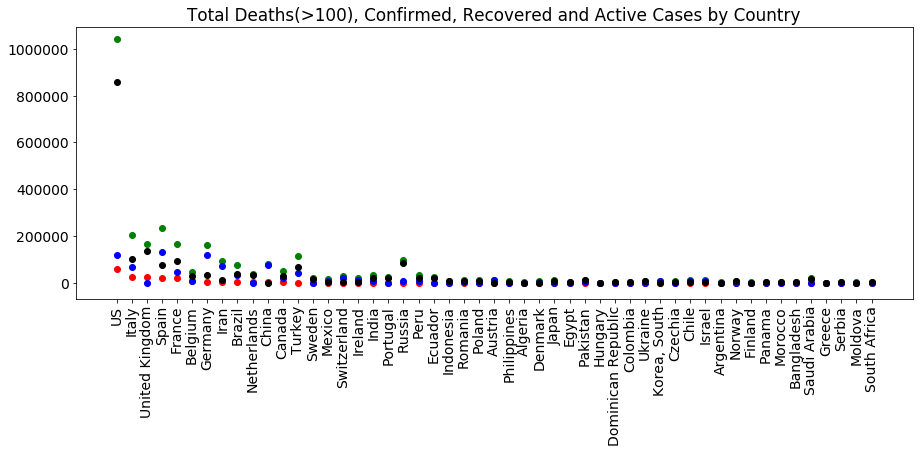

In [43]:
# daily_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
 
results = daily_data.groupby(["Country_Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
results = results.sort_values(by='Deaths', ascending=False)
results = results[results['Deaths']>100]
plt.figure(figsize=(15, 5))
plt.scatter(results['Country_Region'], results['Deaths'], color='red')
plt.scatter(results['Country_Region'], results['Confirmed'], color='green')
plt.scatter(results['Country_Region'], results['Recovered'], color='blue')
plt.scatter(results['Country_Region'], results['Active'], color='black')
plt.xticks(rotation=90)
plt.title('Total Deaths(>100), Confirmed, Recovered and Active Cases by Country')
plt.show()

In [44]:
results = daily_data.groupby(["Country_Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
results = results.sort_values(by='Deaths', ascending=False)
results = results[results['Deaths']>100]
results = results.melt(id_vars="Country_Region").rename(columns=str.title)
results

,Country_Region,Variable,Value
0,US,Deaths,60967
1,Italy,Deaths,27682
2,United Kingdom,Deaths,26166
3,Spain,Deaths,24275
4,France,Deaths,24121
5,Belgium,Deaths,7501
6,Germany,Deaths,6467
7,Iran,Deaths,5957
8,Brazil,Deaths,5513
9,Netherlands,Deaths,4727


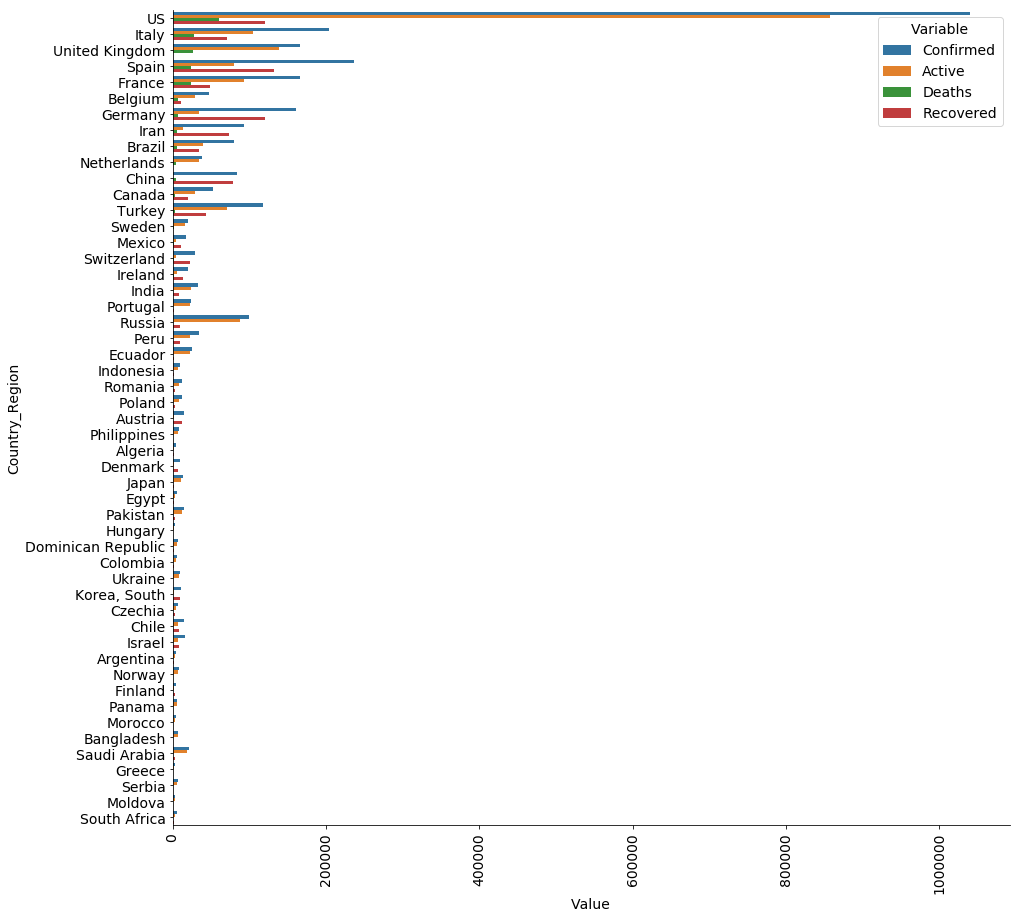

In [45]:
fig, ax1 = plt.subplots(figsize=(15, 15))
sns.barplot(y='Country_Region', x='Value', hue='Variable', hue_order=['Confirmed', 'Active', 'Deaths', 'Recovered'], orient='h', data=results, ax=ax1)
plt.xticks(rotation=90)
sns.despine(fig)

In [46]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

/anaconda3/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


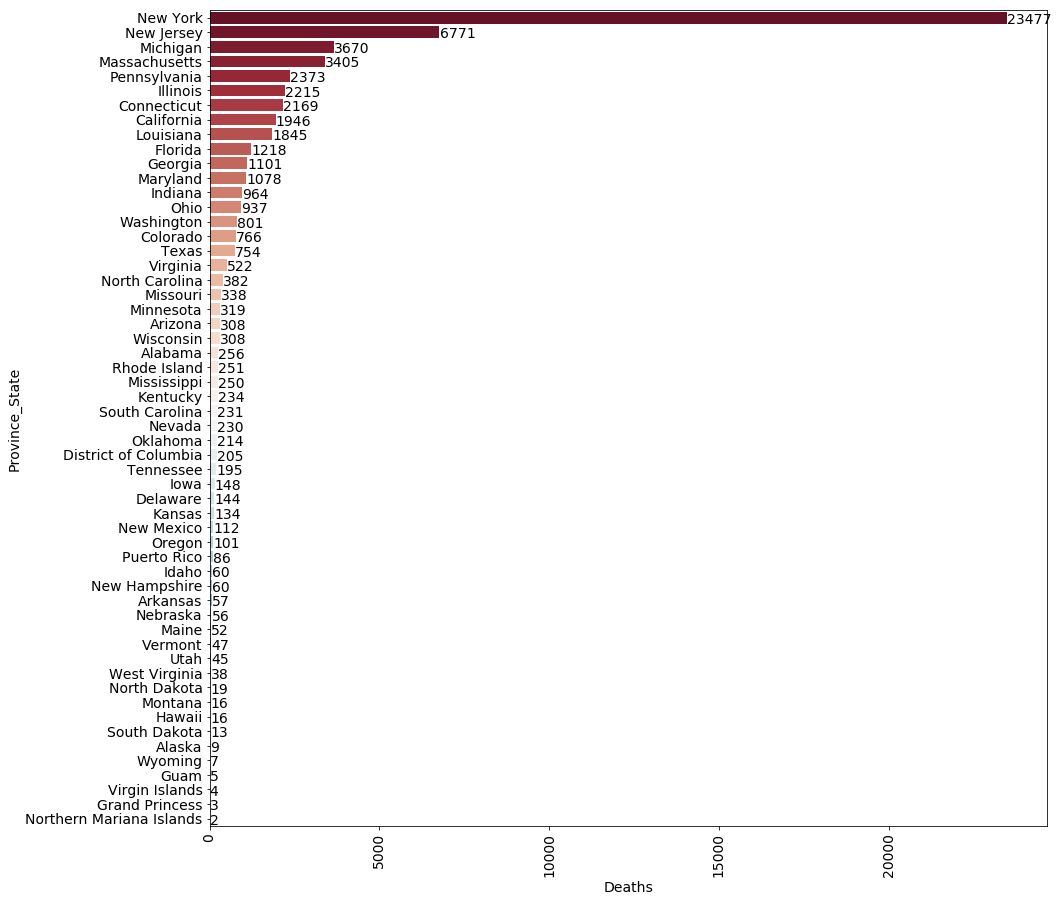

In [47]:
us_data = daily_data[daily_data['Country_Region']=='US'].drop(['Country_Region','Lat', 'Long_'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
us_data = us_data.groupby(['Province_State'])['Deaths'].sum().reset_index()
us_data_death = us_data[us_data['Deaths'] > 0]
us_data_death.sort_values(by='Deaths', ascending=False, inplace=True)
fig, ax1 = plt.subplots(figsize=(15, 15))
plt.xticks(rotation=90)
ax = sns.barplot(data=us_data_death, y='Province_State', x='Deaths', orient='h', palette='RdBu')
show_values_on_bars(ax, "h", 0.3);

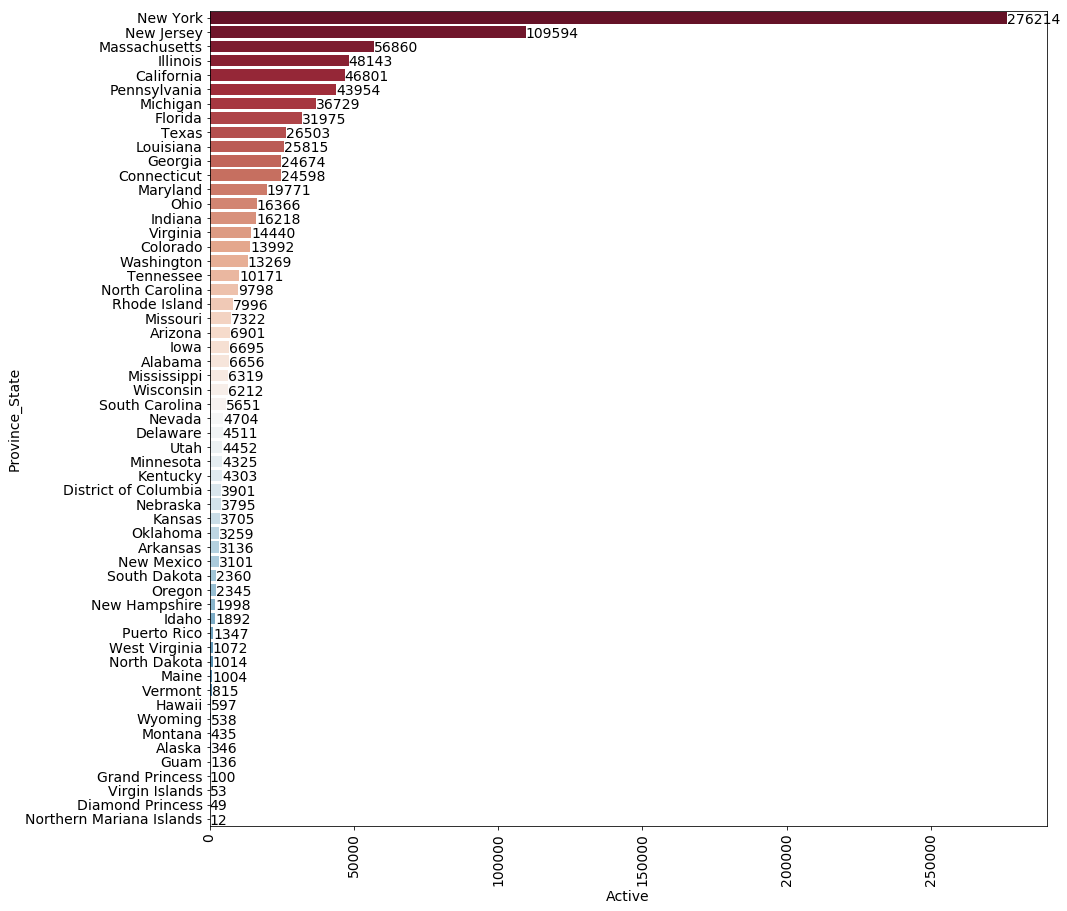

In [48]:
us_data = daily_data[daily_data['Country_Region']=='US'].drop(['Country_Region','Lat', 'Long_'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
us_data = us_data.groupby(['Province_State'])['Active'].sum().reset_index()
us_data_death = us_data[us_data['Active'] > 0]
us_data_death.sort_values(by='Active', ascending=False, inplace=True)
fig, ax1 = plt.subplots(figsize=(15, 15))
plt.xticks(rotation=90)
ax = sns.barplot(data=us_data_death, y='Province_State', x='Active', orient='h', palette='RdBu')
show_values_on_bars(ax, "h", 0.3);

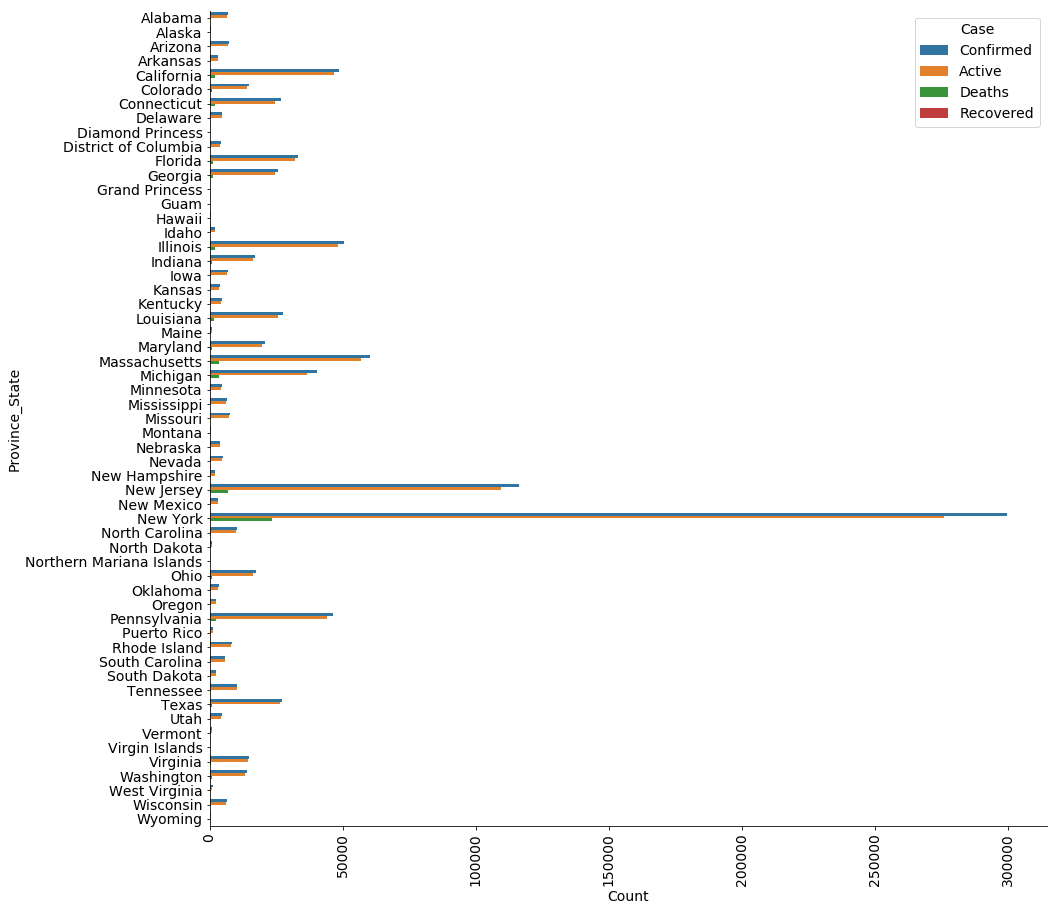

In [49]:
combine_us_data = daily_data[daily_data['Country_Region']=='US'].drop(['Country_Region','Lat', 'Long_'], axis=1)
combine_us_data = combine_us_data[combine_us_data.sum(axis = 1) > 0]
combine_us_data = combine_us_data.groupby(['Province_State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
combine_us_data = pd.melt(combine_us_data, id_vars='Province_State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Case')
fig, ax1 = plt.subplots(figsize=(15, 15))
sns.barplot(y='Province_State', x='Count', hue='Case', hue_order=['Confirmed', 'Active', 'Deaths', 'Recovered'], orient='h', data=combine_us_data, ax=ax1)
plt.xticks(rotation=90)
sns.despine(fig)

/anaconda3/envs/python35/lib/python3.5/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


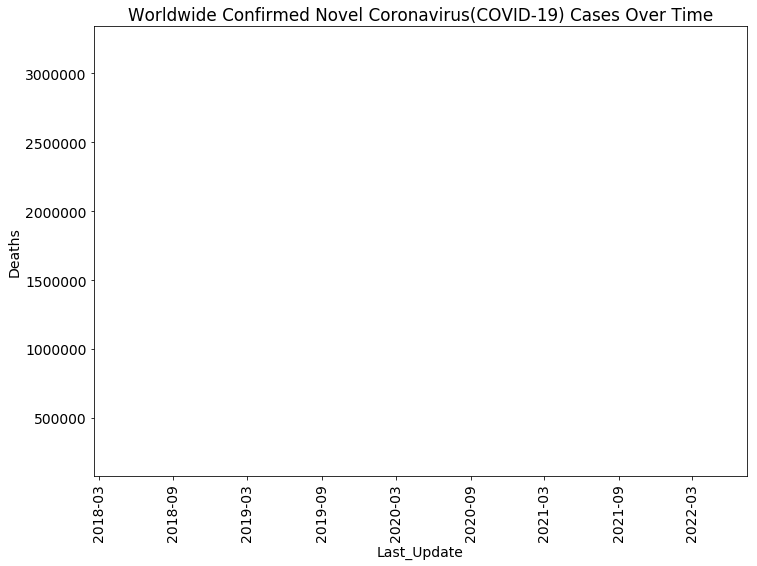

In [50]:
FMT = '%Y-%m-%d %H:%M:%S'
daily_data['Last_Update'] = daily_data['Last_Update'].map(lambda x : datetime.strptime(x, FMT).date())
grouped = daily_data.groupby('Last_Update')['Last_Update', 'Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
plt.title("Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time")
plt.xticks(rotation=90)
sns.lineplot(x="Last_Update", y="Confirmed", data=grouped);
sns.lineplot(x="Last_Update", y="Deaths", data=grouped);